            
# Forecast Cab Booking

---



#Loading the data

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

train_df=pd.read_csv('train.csv')
train_label_df=pd.read_csv('train_label.csv', names=["Total_Booking"])
test_df=pd.read_csv('test.csv')
test_label_df=pd.read_csv('test_label.csv', names=["Total_Booking"])



# Merge Data spread in multiple files(Total Bookings data)

In [ ]:
print("train shape",train_df.shape)
print("train_label shape",train_label_df.shape)
print("test shape",test_df.shape)
print("test_label shape",test_label_df.shape)

train shape (8708, 9)
train_label shape (8708, 1)
test shape (2178, 9)
test_label shape (2178, 1)


In [ ]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [ ]:
train_label_df.head()

,Total_Booking
0,504
1,5
2,139
3,209
4,184


In [ ]:
train_df=pd.concat([train_df,train_label_df],axis=1)
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [ ]:
test_df.head() , test_label_df.head()

(           datetime  season  holiday  workingday                  weather  \
 0   5/10/2012 11:00  Summer        0           1       Clear + Few clouds   
 1     6/9/2012 7:00  Summer        0           0       Clear + Few clouds   
 2    3/6/2011 20:00  Spring        0           0   Light Snow, Light Rain   
 3  10/13/2011 11:00  Winter        0           1           Mist + Cloudy    
 4    6/2/2012 12:00  Summer        0           0       Clear + Few clouds   
 
     temp   atemp  humidity  windspeed  
 0  21.32  25.000        48    35.0008  
 1  23.78  27.275        64     7.0015  
 2  11.48  12.120       100    27.9993  
 3  25.42  28.790        83     0.0000  
 4  25.42  31.060        43    23.9994  ,
    Total_Booking
 0            256
 1             87
 2             11
 3             84
 4            668)

In [ ]:
test_df=pd.concat([test_df,test_label_df],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


#Analyze the dataset
a. Check the shape of the training and testing set

b. Print the data types of each column

c. Check the missing values present in the dataset

shape of the data

In [ ]:
train_df.shape , test_df.shape

((8708, 10), (2178, 10))

datatypes of the columns

In [ ]:
train_df.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_Booking      int64
dtype: object

Any missing data?

In [ ]:
train_df.count()

datetime         8708
season           8708
holiday          8708
workingday       8708
weather          8708
temp             8708
atemp            8708
humidity         8708
windspeed        8708
Total_Booking    8708
dtype: int64

In [ ]:
train_df.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64

#Feature Engineering
a. Create new columns date, hour, weekDay, month from datetime column

b. Coerce the datatype of season, holiday, workingday, and weather to category

c. Drop the datetime column as we have already extracted useful features from it

In [ ]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


a. Create new columns date, hour, weekDay, month from datetime column

c. Drop the datetime column as we have already extracted useful features from it

In [ ]:
date=dt.strptime('11/18/2011 13:00', '%m/%d/%Y %H:%M')
print(date.date(), date.time())

2011-11-18 13:00:00


In [ ]:
#train_df['date']= train_df['datetime'].apply(lambda a: a.split()[0])
train_df['hour']= train_df['datetime'].apply(lambda a: a.split()[1])

train_df['date']=train_df['datetime'].apply(lambda a: dt.strptime(a, '%m/%d/%Y %H:%M').date())
#train_df['hour']=train_df['datetime'].apply(lambda a: dt.strptime(a, '%m/%d/%Y %H:%M').time())

train_df['weekDay']=train_df['date'].apply(lambda a: calendar.day_name[a.weekday()])
train_df['month']=train_df['date'].apply(lambda a: calendar.month_name[a.month])
train_df.drop('datetime', axis=1, inplace=True)
#dropping date column as the date is already extracted as weekDay, month. The date data as such doesn't have any impact
train_df.drop('date', axis=1, inplace=True)
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,19:00,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,4:00,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,9:00,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,16:00,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,13:00,Tuesday,September


In [ ]:
test_df['date']= test_df['datetime'].apply(lambda a: dt.strptime(a, '%m/%d/%Y %H:%M').date())
#test_df['hour']= test_df['datetime'].apply(lambda a: dt.strptime(a, '%m/%d/%Y %H:%M').time())
test_df['hour']= test_df['datetime'].apply(lambda a: a.split()[1])
test_df['weekDay']=test_df['date'].apply(lambda a: calendar.day_name[a.weekday()])
test_df['month']=test_df['date'].apply(lambda a: calendar.month_name[a.month])
test_df.drop('datetime', axis=1, inplace=True)
#dropping date column as the date is already extracted as weekDay, month. The date data as such doesn't have any impact
test_df.drop('date', axis=1, inplace=True)
test_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,11:00,Thursday,May
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,7:00,Saturday,June
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,20:00,Sunday,March
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,11:00,Thursday,October
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,12:00,Saturday,June


b. Coerce the datatype of season, holiday, workingday, and weather to category

In [ ]:
for col in ['season','holiday','workingday','weather']:
  train_df[col]=train_df[col].astype('category')

train_df.dtypes

season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_Booking       int64
hour               object
weekDay            object
month              object
dtype: object

In [ ]:
for col in ['season','holiday','workingday','weather']:
  test_df[col]=test_df[col].astype('category')

test_df.dtypes

season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_Booking       int64
hour               object
weekDay            object
month              object
dtype: object

#Perform Outlier Analysis:
a. Plot Box plots across various features like season, hour of the day, working_day, etc to see if there are any Outlier and note down your inference

b. Remove the outliers present in the dataset

#a. Box Plots

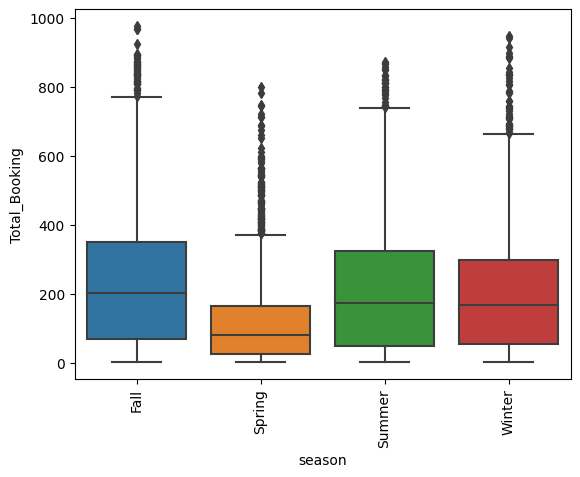

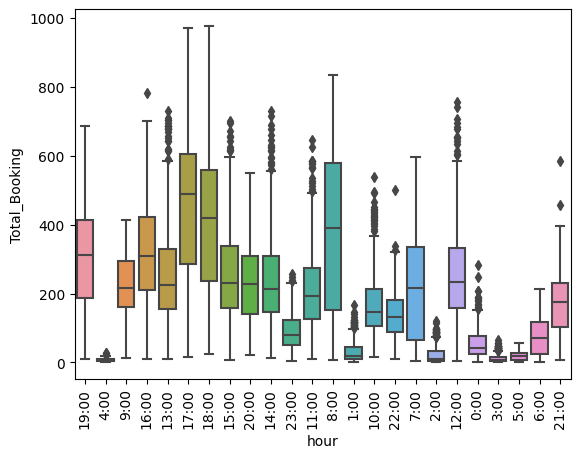

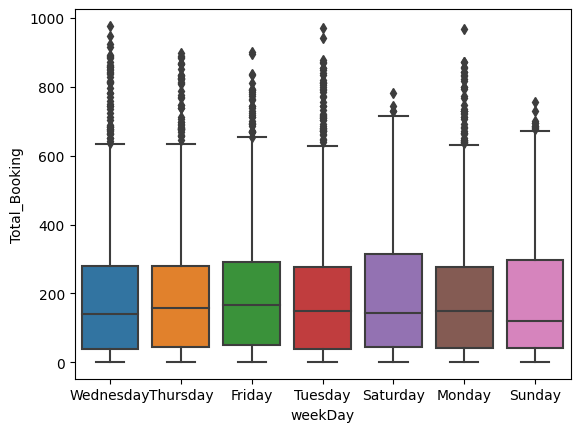

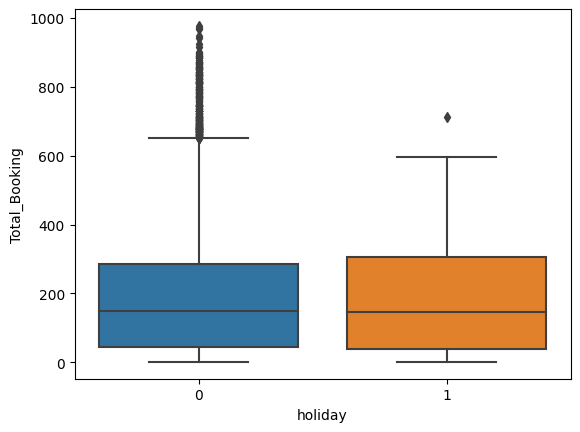

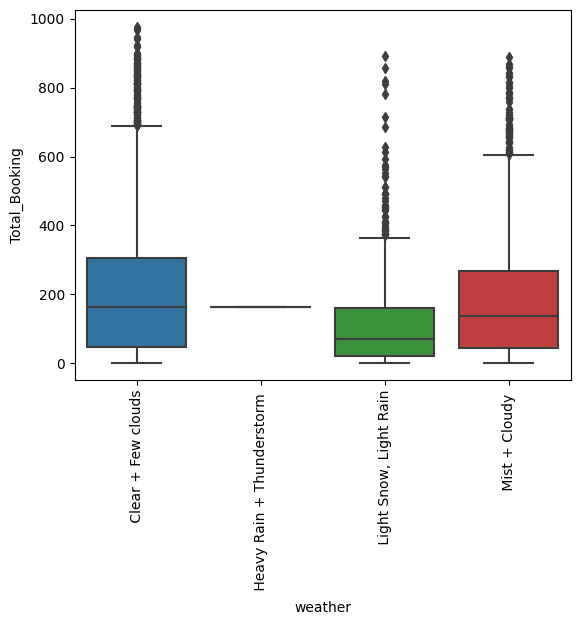

In [ ]:
plt.xticks(rotation=90)

sns.boxplot(train_df, y='Total_Booking', x='season')
plt.show()
plt.xticks(rotation=90)
sns.boxplot(train_df, y='Total_Booking', x='hour')
plt.show()

sns.boxplot(train_df, y='Total_Booking', x='weekDay')
plt.show()
sns.boxplot(train_df, y='Total_Booking', x='holiday')
plt.show()
plt.xticks(rotation=90)
sns.boxplot(train_df, y='Total_Booking', x='weather')
plt.show()

Inferences:
- The cab bookings seem to be peak between 5 PM - 6 PM every day.
- The cab bookings are relatively lower in the Spring season.
- On an average, the cab bookings are lower on Sunday
- There are very less cab bookings when there's Thunderstorms


#b. Remove the outliers present in the dataset

In [ ]:
from re import I
totalBookingsMean=train_df['Total_Booking'].mean()
print('totalBookingsMean:',totalBookingsMean)
train_df['Total_Booking'].describe()

totalBooking_75Percentile=train_df['Total_Booking'].quantile(0.75)
totalBooking_25Percentile=train_df['Total_Booking'].quantile(0.25)
IQR=totalBooking_75Percentile-totalBooking_25Percentile
upperLimit=totalBooking_75Percentile + 1.5*IQR
lowerLimit=totalBooking_25Percentile - 1.5*IQR
print("IQR:",IQR)
print("lowerLimit: ",lowerLimit)
print("upperLimit:", upperLimit)

train_df=train_df[(train_df.Total_Booking>=lowerLimit) & (train_df.Total_Booking<=upperLimit )]
train_df.shape

totalBookingsMean: 193.00700505282498
IQR: 243.0
lowerLimit:  -321.5
upperLimit: 650.5


(8466, 12)

# Box Plots after removing Outliers

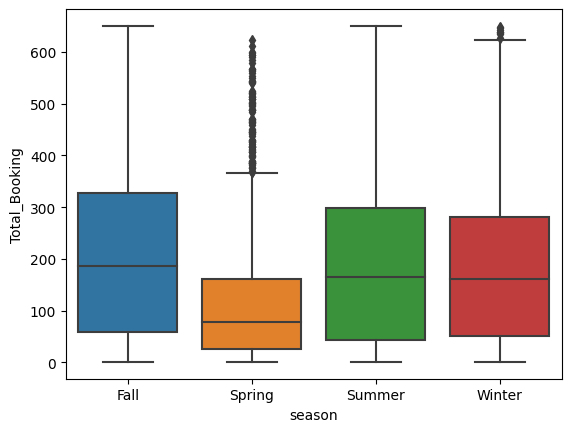

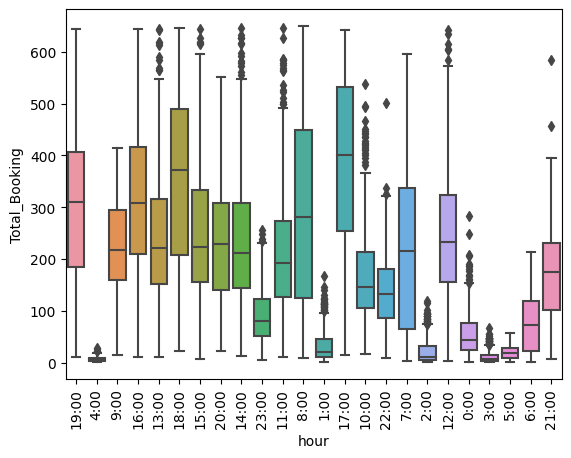

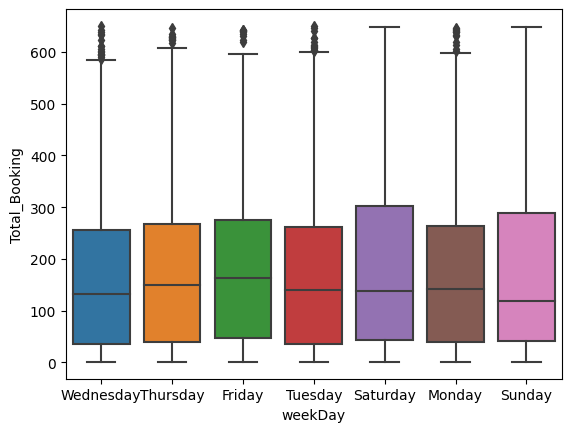

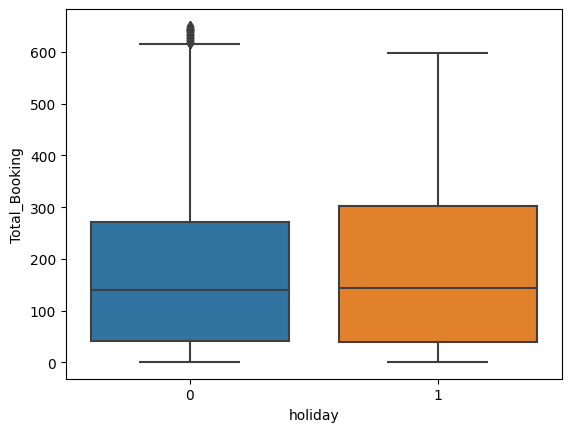

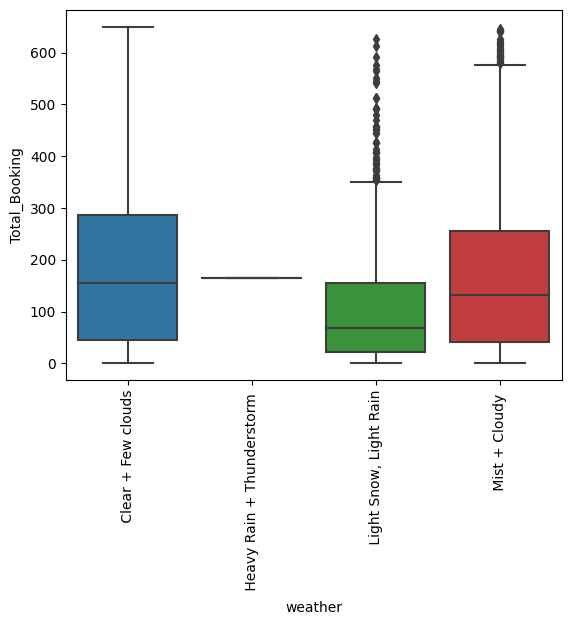

In [ ]:
sns.boxplot(train_df, y='Total_Booking', x='season')
plt.show()
plt.xticks(rotation=90)
sns.boxplot(train_df, y='Total_Booking', x='hour')
plt.show()

sns.boxplot(train_df, y='Total_Booking', x='weekDay')
plt.show()
sns.boxplot(train_df, y='Total_Booking', x='holiday')
plt.show()
plt.xticks(rotation=90)
sns.boxplot(train_df, y='Total_Booking', x='weather')
plt.show()

#5. Perform Correlation Analysis:

a. Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity", "windspeed"]

b. Write down your inference in the markdown cell

#Correlation Plots

               temp     atemp  humidity  windspeed
temp       1.000000  0.985214 -0.052052  -0.031265
atemp      0.985214  1.000000 -0.030614  -0.073184
humidity  -0.052052 -0.030614  1.000000  -0.322381
windspeed -0.031265 -0.073184 -0.322381   1.000000


<Axes: >

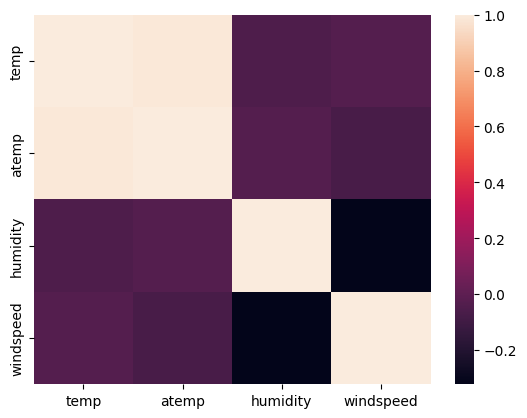

In [ ]:
cols=['temp','atemp','humidity','windspeed']
print(train_df[cols].corr())
sns.heatmap(train_df[cols].corr())

In [ ]:
train_df.drop('atemp', axis=1, inplace=True)
test_df.drop('atemp',axis=1,inplace=True)

Inference from the correlation plots:
 - temp and atemp features are highly correlated. One of them can be dropped.
 - humidity and windspeed have the least correlation.
 - temperature has low correlation with windspeed and humidity.

#Data Visualization
a. Visualize distribution of data: total_booking column and plot the probability distribution plot for the column as well

b. Visualize total_booking vs (Month, Season, Hour, Weekday, Usertype)

c. Use Histograms to plot all the continuous variables present in the data

#a. Distribution plot

<ipython-input-23-123761c13a00>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.Total_Booking, kde=True)


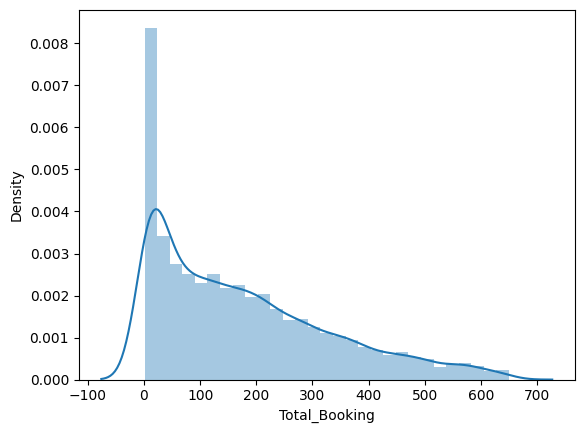

In [ ]:
#sns.set_style('whitegrid')
sns.distplot(train_df.Total_Booking, kde=True)
plt.show()

# b.Visualize total_booking vs (Month, Season, Hour, Weekday)

<ipython-input-24-30c436c6d07d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(labels=df_month.index,rotation=90)
<ipython-input-24-30c436c6d07d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(labels=df_season.index)
<ipython-input-24-30c436c6d07d>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(labels=df_hour.index,rotation=90)
<ipython-input-24-30c436c6d07d>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(labels=df_weekDay.index,rotation=90)


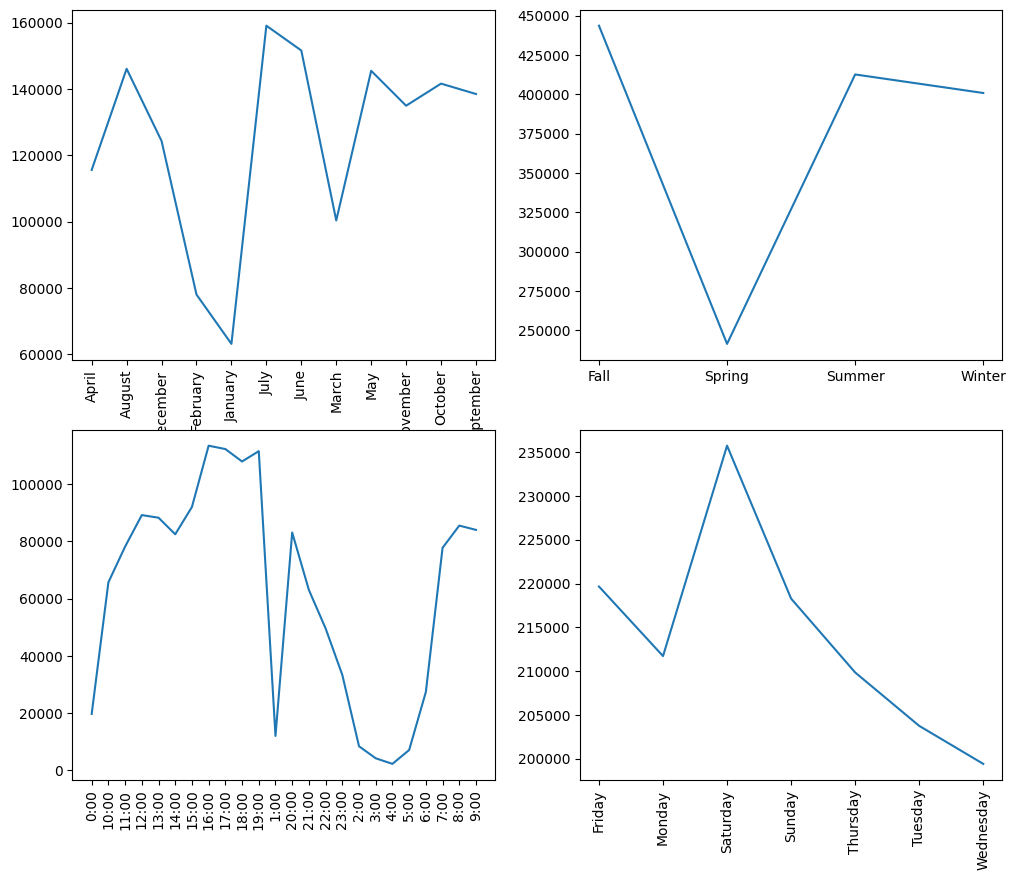

In [ ]:
df_month= train_df.groupby(['month'])['Total_Booking'].sum()
df_season=train_df.groupby(['season'])['Total_Booking'].sum()
df_hour=train_df.groupby(['hour'])['Total_Booking'].sum()
#df_hour.index=df_hour.index.astype(str)
df_weekDay=train_df.groupby(['weekDay'])['Total_Booking'].sum()

fig,ax =plt.subplots(2,2)
fig.set_size_inches(12, 10)
ax[0,0].set_xticklabels(labels=df_month.index,rotation=90)
ax[0,0].plot(df_month, label='month vs Total Bookings')

ax[0,1].set_xticklabels(labels=df_season.index)
ax[0,1].plot(df_season, label='season vs Total Bookings')
ax[1,0].set_xticklabels(labels=df_hour.index,rotation=90)
ax[1,0].plot(df_hour, label='hour vs Total Bookings')
ax[1,1].set_xticklabels(labels=df_weekDay.index,rotation=90)
ax[1,1].plot(df_weekDay, label='weekDay vs Total Bookings')


In [ ]:
df_month.head()

month
April       115553
August      146072
December    124296
February     77963
January      63086
Name: Total_Booking, dtype: int64

#c. Use Histograms to plot all the continuous variables present in the data

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>, <Axes: >]], dtype=object)

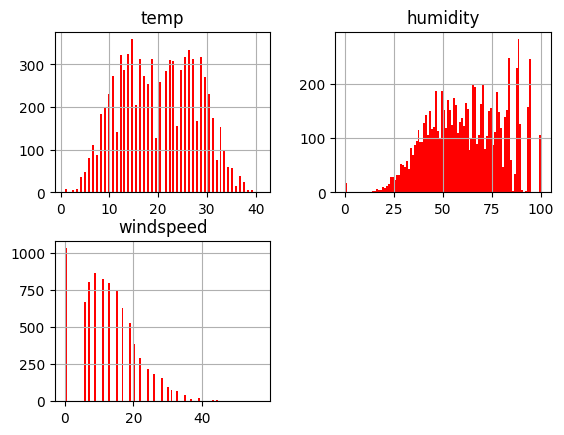

In [ ]:
train_df.head()
cols=['temp','humidity','windspeed','hour']
train_df.hist(column=cols,bins=100, color='r')


#Convert the categorical variables into one hot vector

In [ ]:
cols=['season','weather','weekDay','month','hour']
#cols=['season','weather','weekDay','month']
##The records in the test dataframe provided is not having any records with weather Heavy Rain + Thunderstorms
##Hence merging data before encoding
data_df=pd.concat([train_df,test_df],axis=0)
encoded_data_df=pd.DataFrame()

for col in cols:
   encoded_data_df=pd.concat([encoded_data_df,pd.get_dummies(data_df[col])],axis=1)


data_df=pd.concat([data_df,encoded_data_df], axis=1)
data_df.drop(cols,axis=1,inplace=True)
data_df.head()
#data_df.shape

,holiday,workingday,temp,humidity,windspeed,Total_Booking,Fall,Spring,Summer,Winter,...,22:00,23:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00
0,0,1,22.14,77,16.9979,504,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,28.70,79,19.0012,5,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,5.74,50,22.0028,139,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,13.94,29,8.9981,209,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,30.34,51,19.0012,184,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Split your dataset for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x=data_df.drop('Total_Booking', axis=1)
y=data_df.Total_Booking
y.shape, y.dtypes
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


x_train.shape, x_test.shape, y_train.shape, y_test.shape


((8515, 56), (2129, 56), (8515,), (2129,))

In [ ]:
x_test.head() , y_test.head()

(     holiday workingday   temp  humidity  windspeed  Fall  Spring  Summer  \
 4096       0          1  10.66        41    22.0028     0       1       0   
 1174       0          1   9.84        70     7.0015     0       0       0   
 963        0          1  29.52        74    19.9995     1       0       0   
 1511       0          1  10.66        41    12.9980     0       0       0   
 2105       0          0  18.04        94     0.0000     0       1       0   
 
       Winter   Clear + Few clouds  ...  22:00  23:00  2:00  3:00  4:00  5:00  \
 4096       0                    1  ...      0      0     0     0     0     0   
 1174       1                    1  ...      0      1     0     0     0     0   
 963        0                    1  ...      0      1     0     0     0     0   
 1511       1                    1  ...      0      0     0     0     0     0   
 2105       0                    0  ...      0      0     0     0     0     0   
 
       6:00  7:00  8:00  9:00  
 4096     

#Models


###RandomForest Regressor

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score, mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_predictions=rfr.predict(x_test)
rfr_rmse = round(mean_squared_error(y_test,rfr_predictions,squared=False),3)
rfr_r2_score=round(r2_score(y_test,rfr_predictions),3)
rfr_msle=round(mean_squared_log_error(y_test,rfr_predictions,squared=True),3)
print("RandomForestRegressor:\n" )
print("Mean Squared Log Error:",rfr_msle )
print("RMSE of predictions:  ",rfr_rmse)
print("R2 Score of predictions:  ",rfr_r2_score)

RandomForestRegressor:

Mean Squared Log Error: 0.265
RMSE of predictions:   66.855
R2 Score of predictions:   0.828


(66.855, 0.828)

###AdaBoostRegressor

In [ ]:
adr=AdaBoostRegressor(estimator=RandomForestRegressor(), n_estimators=80)
adr.fit(x_train,y_train)
adr_predictions=adr.predict(x_test)
adr_rmse=round(mean_squared_error(y_test,adr_predictions,squared=False),3)
adr_r2_score=round(r2_score(y_test,adr_predictions),3)

adr_rmse, adr_r2_score

(73.02, 0.795)

###BaggingRegressor

In [ ]:
bgr=BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=100)
bgr.fit(x_train,y_train)
bgr_predictions=bgr.predict(x_test)
bgr_rmse=round(mean_squared_error(y_test,bgr_predictions,squared=False),3)
bgr_r2_score=round(r2_score(y_test,bgr_predictions),3)
bgr_rmse , bgr_r2_score

(67.514, 0.825)

###KNN

In [ ]:
knr=KNeighborsRegressor(n_neighbors=20)
knr.fit(x_train,y_train)
knr_predictions=knr.predict(x_test)
knr_rmse=round(mean_squared_error(y_test,knr_predictions,squared=False),3)
knr_r2_score=round(r2_score(y_test,knr_predictions),3)
knr_rmse, knr_r2_score

(135.288, 0.297)

###SVR

In [ ]:
svr=SVR(C=1000, gamma=0.2, kernel='rbf')
svr.fit(x_train,y_train)
svr_predictions=svr.predict(x_test)
svr_rmse=round(mean_squared_error(y_test,svr_predictions,squared=False),3)
svr_r2_score=round(r2_score(y_test,svr_predictions),3)
svr_rmse, svr_r2_score

(131.949, 0.331)

#Factor Plot of RMSE of various models

<Axes: >

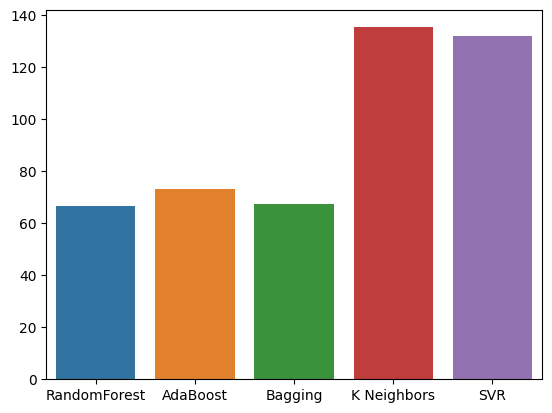

In [ ]:
sns.barplot(x=['RandomForest','AdaBoost', 'Bagging','K Neighbors','SVR'],y=[rfr_rmse,adr_rmse,bgr_rmse,knr_rmse,svr_rmse])

##Best Model
RandomForestRegressor seems to be the best model fitting the given data with least RMSE and better R2 scores.

#Hyper Parameter Tuning using GridSearchCV

###GridSearcCV for RandomForest

In [ ]:
model_params_RF = { 'n_estimators':range(20,100,20),
                   'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth':range(25,50),
                'criterion' :['squared_error']

               }
grid_scores_RF=GridSearchCV(estimator=RandomForestRegressor(),param_grid=model_params_RF,
                            verbose=True,cv=5,return_train_score = True,scoring = 'neg_mean_squared_error',n_jobs=-1)
grid_scores_RF.fit(x_train,y_train)
grid_scores_RF.best_params_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'criterion': 'squared_error',
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 80}

###Apply Best Param recommendations from GridSearchCV on RandomForestRegressor



In [ ]:
rfr_bestParams=RandomForestRegressor(criterion='squared_error', max_depth=80, max_features=1.0, n_estimators=30)
rfr_bestParams.fit(x_train,y_train)
rfr_bestParams_predictions=rfr_bestParams.predict(x_test)

rfr_bestParams_rmse=round(mean_squared_error(y_test,rfr_bestParams_predictions,squared=False),3)
rfr_bestParams_r2_score=round(r2_score(y_test,rfr_bestParams_predictions),3)
rfr_bestParams_msle=round(mean_squared_log_error(y_test,rfr_bestParams_predictions,squared=True),3)
print("RandomForestRegressor with best params:\n" )
print("Mean Squared Log Error:",rfr_bestParams_msle )
print("RMSE of predictions:  ",rfr_bestParams_rmse)
print("R2 Score of predictions:  ",rfr_bestParams_r2_score)



RandomForestRegressor with best params:

Mean Squared Log Error: 0.269
RMSE of predictions:   66.685
R2 Score of predictions:   0.829


##Conclusion
RandomForestRegressor is giving the best results and the results seem to be similar/close before and after the Hyperparameter tuning. The predictions are having a RMSE of around 66 and Mean Squared Log Error close to 0.27. The results from BaggingRegressor with RandomForestRegressor as the base model was also yielding similar results.